In [3]:
import pandas as pd
from pandarallel import pandarallel

pandarallel.initialize()
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

tqdm.pandas()


INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [6]:
from data.load_corpus import CorpusDataManager

corpus_mng = CorpusDataManager()
corpus_mng.available_artists_ids_paths

{'1010841': 'G:\\Shared drives\\ING3 (2022-23) Mlamali\\10 • Deep Learning\\PROJET DL\\AIRapFR - ProjetDL\\data/corpus\\genius-1010841-kobo',
 '1038275': 'G:\\Shared drives\\ING3 (2022-23) Mlamali\\10 • Deep Learning\\PROJET DL\\AIRapFR - ProjetDL\\data/corpus\\genius-1038275-didditrix',
 '1050615': 'G:\\Shared drives\\ING3 (2022-23) Mlamali\\10 • Deep Learning\\PROJET DL\\AIRapFR - ProjetDL\\data/corpus\\genius-1050615-keylargo',
 '1064646': 'G:\\Shared drives\\ING3 (2022-23) Mlamali\\10 • Deep Learning\\PROJET DL\\AIRapFR - ProjetDL\\data/corpus\\genius-1064646-26keuss',
 '1080562': 'G:\\Shared drives\\ING3 (2022-23) Mlamali\\10 • Deep Learning\\PROJET DL\\AIRapFR - ProjetDL\\data/corpus\\genius-1080562-zeguerre',
 '1080563': 'G:\\Shared drives\\ING3 (2022-23) Mlamali\\10 • Deep Learning\\PROJET DL\\AIRapFR - ProjetDL\\data/corpus\\genius-1080563-badjer',
 '1101709': 'G:\\Shared drives\\ING3 (2022-23) Mlamali\\10 • Deep Learning\\PROJET DL\\AIRapFR - ProjetDL\\data/corpus\\genius-110

# Analyse - focus sur un artiste

 ## 0. load data

In [7]:
df_rohff = corpus_mng.get_df_artist_lyrics_by_name("rohff")
df_rohff

Loading G:\Shared drives\ING3 (2022-23) Mlamali\10 • Deep Learning\PROJET DL\AIRapFR - ProjetDL\data/corpus\genius-1908-rohff\df_genius_rohff_all_songs_202212.csv


,artist,primary_artist.id,lyrics,id,title,album.name,release_date_components.year,artist_names,featured_artists,language
0,Rohff,1908,Dans ta race Lyrics[Couplet 1 : Rohff]\nJ'me p...,2273542,Dans ta race,L’invincible armada,1997.0,"Rohff (Ft. 113, Kery James, Sayd des Mureaux &...","[{'api_path': '/artists/2131584', 'header_imag...",fr
1,Rohff,1908,Appelle-moi Rohff Lyrics[Intro]\nRohff au micr...,61732,Appelle-moi Rohff,Le code de l’honneur,1999.0,Rohff,[],fr
2,Rohff,1908,Apprends à vivre Lyrics[Intro]\nJ't'apprends r...,182778,Apprends à vivre,Le code de l’honneur,1999.0,Rohff (Ft. Leïla Rami),"[{'api_path': '/artists/23426', 'header_image_...",fr
3,Rohff,1908,Catastrohff Lyrics[Couplet 1]\nDémarrage hold-...,99876,Catastrohff,Le code de l’honneur,1999.0,Rohff,[],fr
4,Rohff,1908,Du fond du cœur Lyrics[Intro]\nAu clair de la ...,137294,Du fond du cœur,Le code de l’honneur,1999.0,Rohff,[],fr
...,...,...,...,...,...,...,...,...,...,...
335,Rohff,1908,Kunta Sankara Lyrics[Refrain]\nKunta SankaraYo...,5478298,Kunta Sankara,nan,NaN,Rohff,[],en
336,Rohff,1908,Le pouvoir 2 LyricsRefrain\n\nT’arrives comme ...,95639,Le pouvoir 2,nan,NaN,Rohff,[],nan
337,Rohff,1908,Numéro 1 LyricsAhYou might also likeEmbed,100238,Numéro 1,nan,NaN,Rohff,[],nan
338,Rohff,1908,T ki LyricsA mort les juifs\nEt les arabes\nEt...,3763579,T ki,nan,NaN,Rohff,[],fr


In [4]:
df_rohff.columns.tolist()

['artist',
 'primary_artist.id',
 'lyrics',
 'id',
 'title',
 'album.name',
 'release_date_components.year',
 'artist_names',
 'featured_artists',
 'language']

## 2. Date

In [11]:
for album_name, year in [("La Cuenta", 2010), ("10 ans d’avance", 2004), ("Talents Fâchés 2", 2004), ("Talents Fâchés 4", 2009)]:
    df_rohff.loc[df_rohff["album.name"] == album_name, "release_date_components.year"] = year

df_rohff[df_rohff["release_date_components.year"].isnull()][
    ["title", "artist_names", "album.name", "release_date_components.year"]]

,title,artist_names,album.name,release_date_components.year
331,Excuse Moi,Rohff,Le cauchemar du rap français - Chapitre 1,NaN
334,Dis mon nom (avec jasmin lopez),Rohff,NaN,NaN
335,Kunta Sankara,Rohff,NaN,NaN
336,Le pouvoir 2,Rohff,NaN,NaN
337,Numéro 1,Rohff,NaN,NaN
338,T ki,Rohff,NaN,NaN
339,Zlatana (West Indies Remix),Rohff,NaN,NaN


In [14]:
df_rohff["release_date_components.year"] = df_rohff["release_date_components.year"].fillna(-1)
df_rohff["release_date_components.year"] = df_rohff["release_date_components.year"].astype(int)
df_rohff["release_date_components.year"] = df_rohff["release_date_components.year"].replace(-1,np.nan)

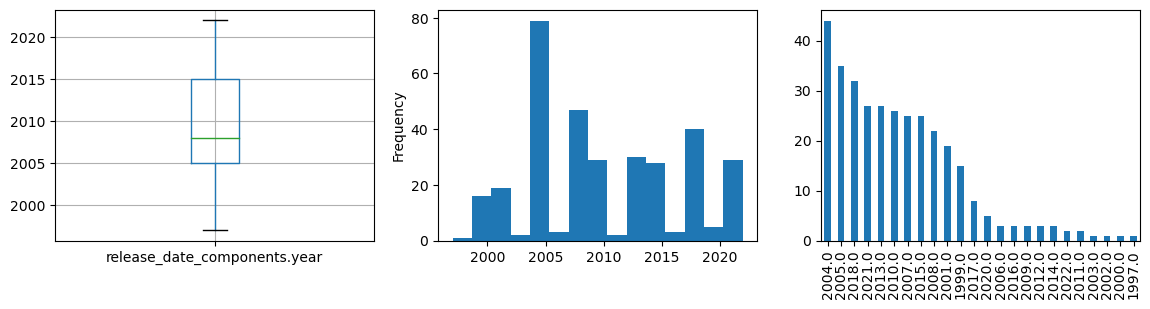

In [16]:
def plot_year_graphs(df):
    plt.figure(figsize=(14,4))

    plt.subplot(1,3,1)
    df.boxplot(column=["release_date_components.year"])

    plt.subplot(1,3,2)
    df["release_date_components.year"].plot.hist(bins=15)

    plt.subplot(1,3,3)
    df["release_date_components.year"].value_counts().plot.bar()


plot_year_graphs(df_rohff)

## 3. Lyrics
### preprocessing

In [12]:
from data.preprocessing import preprocess_genius_text
from functools import partial

In [18]:
text = df_rohff["lyrics"][0]
text = preprocess_genius_text(text, lemmatization=True, token_output=True)
print(text)
text

['je', 'me', 'poste', 'sur', 'le', 'beat', ',', 'je', 'attend', 'que', 'tu', "t'", 'ramollisse', ',', 'mc', 'je', 'venir', 'dégainer', '\n', 'mon', 'mission', 'être', 'tellement', 'réussir', 'que', 'on', 'dire', 'que', 'tu', 'te', 'es', 'suicider', '\n', 'aussi', 'précis', 'que', 'le', 'enfoiré', "qu'", 'avoir', 'buter', 'kennedy', '\n', 'je', 'défouraille', 'comme', 'ali', ',', 'ce', 'être', 'hardcore', 'pour', "n'", 'importe', 'quel', 'mc', '\n', 'dans', 'le', 'guet', '-', 'apen', ',', 'on', 'te', 'saigne', 'au', 'mic', 'comme', 'dans', 'le', 'vie', 'quotidienne', '\n', 'je', 'ajoute', 'même', 'pour', 'le', 'gens', 'qui', 'se', 'plaindre', 'que', 'il', 'avoir', 'le', 'haine', 'ou', 'que', 'il', 'nous', 'craindre', '\n', 'falloir', 'pas', 'tmennek', ',', 'khouyer', "y'", 'avoir', 'pas', 'de', 'détail', "y'", 'avoir', 'rien', "qu'", 'un', 'représaille', '\n', 'je', 'voir', 'le', 'caille', ',', 'ce', 'être', 'pour', 'le', 'fun', 'ou', 'pour', 'le', 'maille', '\n', 'je', 'reste', 'origin

['je',
 'me',
 'poste',
 'sur',
 'le',
 'beat',
 ',',
 'je',
 'attend',
 'que',
 'tu',
 "t'",
 'ramollisse',
 ',',
 'mc',
 'je',
 'venir',
 'dégainer',
 '\n',
 'mon',
 'mission',
 'être',
 'tellement',
 'réussir',
 'que',
 'on',
 'dire',
 'que',
 'tu',
 'te',
 'es',
 'suicider',
 '\n',
 'aussi',
 'précis',
 'que',
 'le',
 'enfoiré',
 "qu'",
 'avoir',
 'buter',
 'kennedy',
 '\n',
 'je',
 'défouraille',
 'comme',
 'ali',
 ',',
 'ce',
 'être',
 'hardcore',
 'pour',
 "n'",
 'importe',
 'quel',
 'mc',
 '\n',
 'dans',
 'le',
 'guet',
 '-',
 'apen',
 ',',
 'on',
 'te',
 'saigne',
 'au',
 'mic',
 'comme',
 'dans',
 'le',
 'vie',
 'quotidienne',
 '\n',
 'je',
 'ajoute',
 'même',
 'pour',
 'le',
 'gens',
 'qui',
 'se',
 'plaindre',
 'que',
 'il',
 'avoir',
 'le',
 'haine',
 'ou',
 'que',
 'il',
 'nous',
 'craindre',
 '\n',
 'falloir',
 'pas',
 'tmennek',
 ',',
 'khouyer',
 "y'",
 'avoir',
 'pas',
 'de',
 'détail',
 "y'",
 'avoir',
 'rien',
 "qu'",
 'un',
 'représaille',
 '\n',
 'je',
 'voir',
 '

In [24]:
def preprocess_genius_lyrics_from_df(df):
    df = df.copy()
    preprocessing = partial(preprocess_genius_text, lemmatization=True, stop_words_removal=True,
                            punct_removal=True, token_output=True,
                            stop_words_to_keep=["je", "tu", "il", "elle", "nous", "vous", "être", "avoir"])
    df["lyrics_tokens"] = df['lyrics'].parallel_apply(preprocessing)  # todo : rename _tokens
    return df

In [13]:



df_rohff = preprocess_genius_lyrics_from_df(df_rohff)
df_rohff

,artist,primary_artist.id,lyrics,id,title,album.name,release_date_components.year,artist_names,featured_artists,language,lyrics_tokens
0,Rohff,1908,Dans ta race Lyrics[Couplet 1 : Rohff]\nJ'me p...,2273542,Dans ta race,L’invincible armada,1997.0,"Rohff (Ft. 113, Kery James, Sayd des Mureaux &...","[{'api_path': '/artists/2131584', 'header_imag...",fr,"[poste, beat, attend, tu, ramollisse, mc, veni..."
1,Rohff,1908,Appelle-moi Rohff Lyrics[Intro]\nRohff au micr...,61732,Appelle-moi Rohff,Le code de l’honneur,1999.0,Rohff,[],fr,"[rohff, micro, \n, microphone, contact, attaqu..."
2,Rohff,1908,Apprends à vivre Lyrics[Intro]\nJ't'apprends r...,182778,Apprends à vivre,Le code de l’honneur,1999.0,Rohff (Ft. Leïla Rami),"[{'api_path': '/artists/23426', 'header_image_...",fr,"[apprend, rien, gros, sommeil, cousin, mort, \..."
3,Rohff,1908,Catastrohff Lyrics[Couplet 1]\nDémarrage hold-...,99876,Catastrohff,Le code de l’honneur,1999.0,Rohff,[],fr,"[démarrage, hold, up, meilleur, pilote, david,..."
4,Rohff,1908,Du fond du cœur Lyrics[Intro]\nAu clair de la ...,137294,Du fond du cœur,Le code de l’honneur,1999.0,Rohff,[],fr,"[clair, lune, chandelle, mourir, \n, pleurer, ..."
...,...,...,...,...,...,...,...,...,...,...,...
335,Rohff,1908,Kunta Sankara Lyrics[Refrain]\nKunta SankaraYo...,5478298,Kunta Sankara,nan,NaN,Rohff,[],en,"[kunta, sankara, lyric, \n, kunta, sankarayou,..."
336,Rohff,1908,Le pouvoir 2 LyricsRefrain\n\nT’arrives comme ...,95639,Le pouvoir 2,nan,NaN,Rohff,[],nan,"[arrive, coup, crasse, coup, crosse, néger, \n..."
337,Rohff,1908,Numéro 1 LyricsAhYou might also likeEmbed,100238,Numéro 1,nan,NaN,Rohff,[],nan,"[numéro, 1, lyricsahyou, might, also, likeembed]"
338,Rohff,1908,T ki LyricsA mort les juifs\nEt les arabes\nEt...,3763579,T ki,nan,NaN,Rohff,[],fr,"[t, ki, lyricser, mourir, juif, \n, arabe, \n,..."


### • Vocabulaire

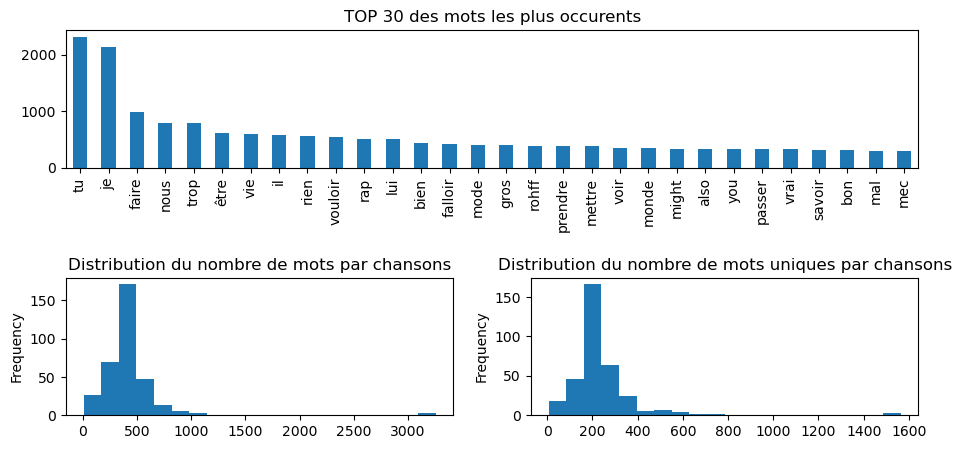

\n         26227
tu          2313
je          2128
faire        983
nous         792
           ...  
d'100          1
amy            1
bushy          1
racheté        1
dévorer        1
Name: lyrics_tokens, Length: 17044, dtype: int64

In [29]:
def plot_vocabulary_analyze(df: pd.DataFrame, top_words: int = 30, tokens_to_drop=["\n", "y'"]):
    df["lyrics_tokens_len"] = df['lyrics_tokens'].apply(lambda x: len(x))
    df["lyrics_unique_tokens_len"] = df['lyrics_tokens'].apply(lambda x: len(set(x)))
    plt.figure(figsize=(11, 5))
    grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.8)

    ax = plt.subplot(grid[0, :])
    ax.set_title(f"TOP {top_words} des mots les plus occurents")
    tokens_exploded = df["lyrics_tokens"].explode()
    tokens_exploded.value_counts().drop(index=tokens_to_drop)[:top_words].plot.bar()

    ax = plt.subplot(grid[1, 0])
    ax.set_title("Distribution du nombre de mots par chansons")
    df["lyrics_tokens_len"].plot.hist(bins=20)

    ax = plt.subplot(grid[1, 1])
    ax.set_title("Distribution du nombre de mots uniques par chansons")
    df["lyrics_unique_tokens_len"].plot.hist(bins=20)

    #plt.legend()
    plt.show()
    return tokens_exploded.value_counts()


plot_vocabulary_analyze(df_rohff)

# Analyze - focus sur l'ensemble des datasets

## 0. load data

In [1]:
from data.load_corpus import CorpusDataManager

corpus_mng = CorpusDataManager()
corpus_mng.available_artists_ids_names

{1010841: 'kobo',
 1038275: 'didditrix',
 1050615: 'keylargo',
 1064646: '26keuss',
 1080562: 'zeguerre',
 1080563: 'badjer',
 1101709: 'zola',
 1114883: 'flippdinero',
 1120806: 'juniorbvndo',
 11417: 'mokobé',
 1146153: 'futurcrew',
 11471: 'ttc',
 11499: 'sethgueko',
 11574: '113',
 1159944: 'zamdane',
 11623: 'zoxea',
 11650: 'lacrim',
 1166531: 'cinco',
 1167573: 'eddydepretto',
 12061: 'diams',
 12066: 'faflarage',
 1207099: 'zikxo',
 12085: 'sofiane',
 12091: '1995',
 1212452: 'dauzi',
 1215518: 'mohalasquale',
 1219062: 'bolémvn',
 12191: 'rocéfra',
 1242021: 'heusslenfoiré',
 12437: 'tlf',
 1247832: 'kobalad',
 1250958: 'tsewthekid',
 1261: 'sexiondassaut',
 12648: 'matthewkoma',
 1265: 'médine',
 126970: 'chineseman',
 1271282: 'liims',
 1273: 'keryjames',
 1275621: 'kepler',
 1282: 'booba',
 1282346: 'brvmsoo',
 1285728: '4keus',
 1286: 'orelsan',
 128813: 'plk',
 128867: 'soulswing',
 1296565: 'cg6',
 1303: 'lafouine',
 13062: 'alphawann',
 13063: 'nekfeu',
 1310: 'mcsolaar

In [2]:
corpus_mng.get_id_by_artist_name("rohff")

1908

In [5]:
df_corpus = corpus_mng.get_full_df_lyrics_corpus(preprocessed=True,ignore_artist_ids=[1101709,1261])
df_corpus

Loading 262 csv files


100%|██████████| 262/262 [00:12<00:00, 20.55it/s]


,artist,primary_artist.id,lyrics,id,title,album.name,release_date_components.year,artist_names,featured_artists,language
0,Médine,1265,"['redirigés', 'dans', 'les', 'ghettos', 'à', ""...",49881,Ennemi d’État,nan,2005.0,Médine (Ft. Aboubakr),"[{'api_path': '/artists/11625', 'header_image_...",fr
1,Médine,1265,"['alger', ',', 'capitale', ',', 'au', 'commenc...",79900,17 Octobre,nan,2006.0,Médine,[],fr
2,Médine,1265,"['j’', 'ai', 'mis', 'mon', 'casque', 'et', 'mo...",5148,Lecture aléatoire,nan,2006.0,Médine,[],fr
3,Médine,1265,"['archéologue', ',', 'artisan', ',', 'artifici...",99846,Musique Archéologique,nan,2006.0,Médine,[],fr
4,Médine,1265,"['dans', 'le', 'cosmos', ""c'"", 'est', 'la', 'c...",725144,Planète rap,nan,2006.0,Médine,[],fr
...,...,...,...,...,...,...,...,...,...,...
17870,Keeqaid,3006210,"['hhahhahhhahha', '\n', 'moi', '\n', 'toi', '\...",7545950,Français,nan,2021.0,Keeqaid,[],fr
17871,Keeqaid,3006210,"['je', 'viens', 'de', 'saint-denis', '\n', 'ic...",7545988,Pétrole & Fôret,nan,2021.0,Keeqaid,[],fr
17872,Keeqaid,3006210,"[""j'"", 'veux', 'les', 'tales', '\n', 'un', 'qu...",7546062,Repose en paix drill,nan,2021.0,Keeqaid (Ft. Keeqaid & La Nstra),"[{'api_path': '/artists/3006266', 'header_imag...",fr
17873,Keeqaid,3006210,"['ici', ""t'"", 'as', 'forcément', 'la', 'dalle'...",7546003,Sous ma TN,nan,2021.0,Keeqaid,[],fr


In [5]:
df_corpus.columns

Index(['artist', 'primary_artist.id', 'lyrics', 'id', 'title', 'album.name',
       'release_date_components.year', 'artist_names', 'featured_artists',
       'language'],
      dtype='object')

In [6]:
n_unique_artists = len(df_corpus["artist"].unique())
print(f"{n_unique_artists} unique artists")

231 unique artists


In [7]:
cb = 30
plt.figure(figsize=(20, 3))
ax = plt.subplot(2, 2, 1)
ax.set_title("Nombre de sons par artist FR")

df_corpus.artist.value_counts()[:cb].plot.bar()

NameError: name 'plt' is not defined

nom des titres les plus recurrentres

<AxesSubplot: title={'center': 'Nombre de titre'}>

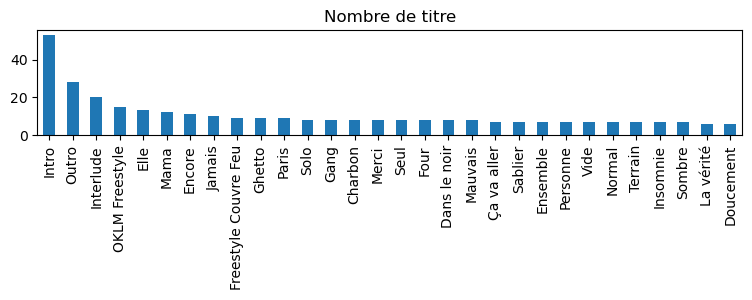

In [9]:
cb = 30
plt.figure(figsize=(20, 3))
ax = plt.subplot(2, 2, 1)
ax.set_title("Nombre de titre")
df_corpus.title.value_counts()[:cb].plot.bar()

nombre de phrases les plus recurrent (phrase, decomposer en 5-6-7-8 grams)

## 2. Date

In [26]:
plot_year_graphs(df_corpus)

NameError: name 'plot_year_graphs' is not defined

## 3. Lyrics
### preprocessing

In [25]:
df_corpus = preprocess_genius_lyrics_from_df(df_corpus)
df_corpus.shape

H:\anaconda3\envs\nlp_rap_env\lib\site-packages\pandarallel\data_types\series.py:16: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yield data[chunk_]


(17441, 13)

### • Vocabulaire

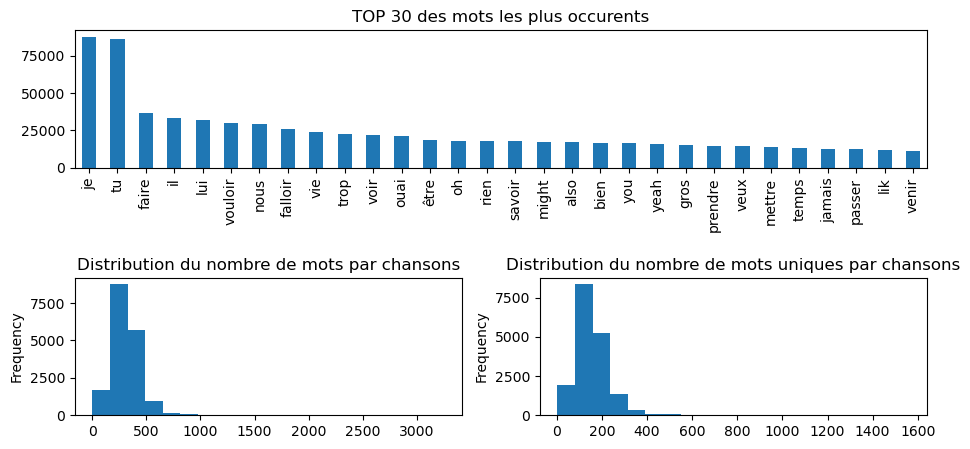

\n          959563
je           87611
tu           86032
faire        36351
il           33258
             ...  
babani           1
grozny           1
essieux          1
becoli           1
timonier         1
Name: lyrics_tokens, Length: 113982, dtype: int64

In [30]:
tokens_exploded_counts = plot_vocabulary_analyze(df_corpus)
tokens_exploded_counts

In [33]:
print(f"{tokens_exploded_counts.sum()} nb de tokens total")
print(f"{len(tokens_exploded_counts.index)} tokens uniques")

113982 tokens uniques
5478326 nb de tokens total


In [ ]:
tokens_exploded_counts.sort_values(ascending=True).plot.bar()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x00000205D8C4AA70> (for post_execute):

#todto wor cloud

## verification des langues